# PA 1: Exploratory Analysis over Federal Emergencies and Disasters

## Student Details

Student Name and ID: Sudharsan Srinivasan, ID:1001755919

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'database.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
[2.5 points]


## Assignment Details

In this assignment, you will conduct a guided exploration over the Federal Emergencies and Disasters dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work on 63 years of Federal Disasters dataset. Specifically, you will work on database.csv file from kaggle repository (https://www.kaggle.com/fema/federal-disasters). The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:
- Declaration Number - Unique number for each emergency declared
- Declaration Type - Type of declaration
- Declaration Date - Date of declaration
- State - State affected
- County - County affected
- Disaster Type 
- Disaster Title
- Start Date - The date event started
- End Date - The date event ended
- Close Date - End of Declaration
- Individual Assistance Program - Whether IAP was provided or not?
- Individuals & Households Program - Whether IHP was provided or not?
- Public Assistance Program - Whether PAP was provided or not?
- Hazard Mitigation Program - Whether HMP was provided or not?


## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('database.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting to know the dataset. Your first task will be to get some basic information by using Pandas features.

In [88]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_data data frame are: \n", list(df_data)) 

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Start Date' column of the df_data 
startdate = df_data["Start Date"].describe()

print ("\n\n>>Task 1-c: Descriptive details of 'Start Date' column are\n",startdate)

# 10 points
#Task 1-d: Print ALL the unique values of Disaster Title and Counties  .
df_data = df_data.dropna(subset=['County'])
disaster_title_list  = df_data["Disaster Title"].unique()
unique_county_list = df_data["County"].unique()

print("\n\n >>Task 1-d:")
print(disaster_title_list)
print("#####################################################")
print(unique_county_list) 



>>Task 1-a: Details of df_data data frame are: 
 ['Declaration Number', 'Declaration Type', 'Declaration Date', 'State', 'County', 'Disaster Type', 'Disaster Title', 'Start Date', 'End Date', 'Close Date', 'Individual Assistance Program', 'Individuals & Households Program', 'Public Assistance Program', 'Hazard Mitigation Program', 'difference', 'year']


>>Task 1-b: Number of rows:45988 and number of columns:16


>>Task 1-c: Descriptive details of 'Start Date' column are
 count                   45988
unique                   2165
top       2005-08-29 00:00:00
freq                     2764
first     1959-01-29 00:00:00
last      2017-02-07 00:00:00
Name: Start Date, dtype: object


 >>Task 1-d:
['Flood' 'Heavy Rains and Flooding'
 'Severe Storms, Heavy Rains, and Flooding' ... 'Hurricane Matthew'
 'Severe Stotms and Flooding'
 'Potential Failure of the Emergency Spillway at Oroville Lake']
#####################################################
['Clay County' 'Alpine County' 'Amador Coun

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [32]:
# 8 points
#Task 2-a: Find out the declaration titles of type 'Emergency' which lasted more than 120 days
df_data['numdays']= (pd.to_datetime(df_data['End Date'])- pd.to_datetime(df_data['Start Date'])).dt.days
Emergency_greater_120 = df_data[(df_data['Declaration Type'] == 'Emergency') & (df_data.numdays > 120)]['Disaster Title'].unique()
print (">>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are %s" 
       % (Emergency_greater_120))

# 8 points
#Task 2-b: Find out the total number of declarations between 1998 and 1999 where Individual Assistance Program was provided for the state of Texas.
#


num_declarations_1998_1999 = len(df_data[(df_data['State']=='TX')&(df_data['Individual Assistance Program']=='Yes') & (((pd.to_datetime(df_data['Declaration Date'])).dt.year>=1998 ) & ((pd.to_datetime(df_data['Declaration Date'])).dt.year<=1999 ))])

print ("\n\n>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were %s" 
       % (num_declarations_1998_1999))

# 14 points
#Task 2-c: Find out the top 10 counties with the declaration type 'Disaster' and 'Emergency' for all years.
n = 10
disaster=df_data[df_data['Declaration Type']=='Disaster']
disaster=disaster.groupby('County').count().sort_values(by='Declaration Number',ascending=False).iloc[0:10]
disaster=disaster.reset_index()
top10_disasters=disaster["County"]
emergency=df_data[df_data['Declaration Type']=='Emergency']
emergency=emergency.groupby('County').count().sort_values(by='Declaration Number',ascending=False).iloc[0:10]
emergency=emergency.reset_index()
top10_emergencies=emergency["County"]
print ("\n\n>>Task 2-c: top 10 counties with the most disasters for all years are: \n%s" % (top10_disasters))
print ("\n\n>>Task 2-c: top 10 counties with the most emergencies for all years are: \n%s" % (top10_emergencies))




>>Task 2-a: The disaster titles of type 'Emergency' which lasted more than 120 days are ['Extreme  Fire Hazard' 'Extreme Fire Hazards' 'West Nile Virus' 'Drought'
 'Wildfires'], 


>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were 322


>>Task 2-c: top 10 counties with the most disasters for all years are:
 0    Washington County
1     Jefferson County
2       Jackson County
3      Franklin County
4       Lincoln County
5          Clay County
6       Madison County
7    Montgomery County
8        Monroe County
9        Marion County
Name: County, dtype: object  


>>Task 2-c: top 10 counties with the most emergencies for all years are:
 0    Washington County
1      Franklin County
2       Jackson County
3     Jefferson County
4    Montgomery County
5        Monroe County
6       Lincoln County
7       Madison County
8        Warren County
9        Marion County
Name: County, dtype: object  


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib may look unaesthetic and so you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have assigned 10 points for the aesthetics of your visualizations.

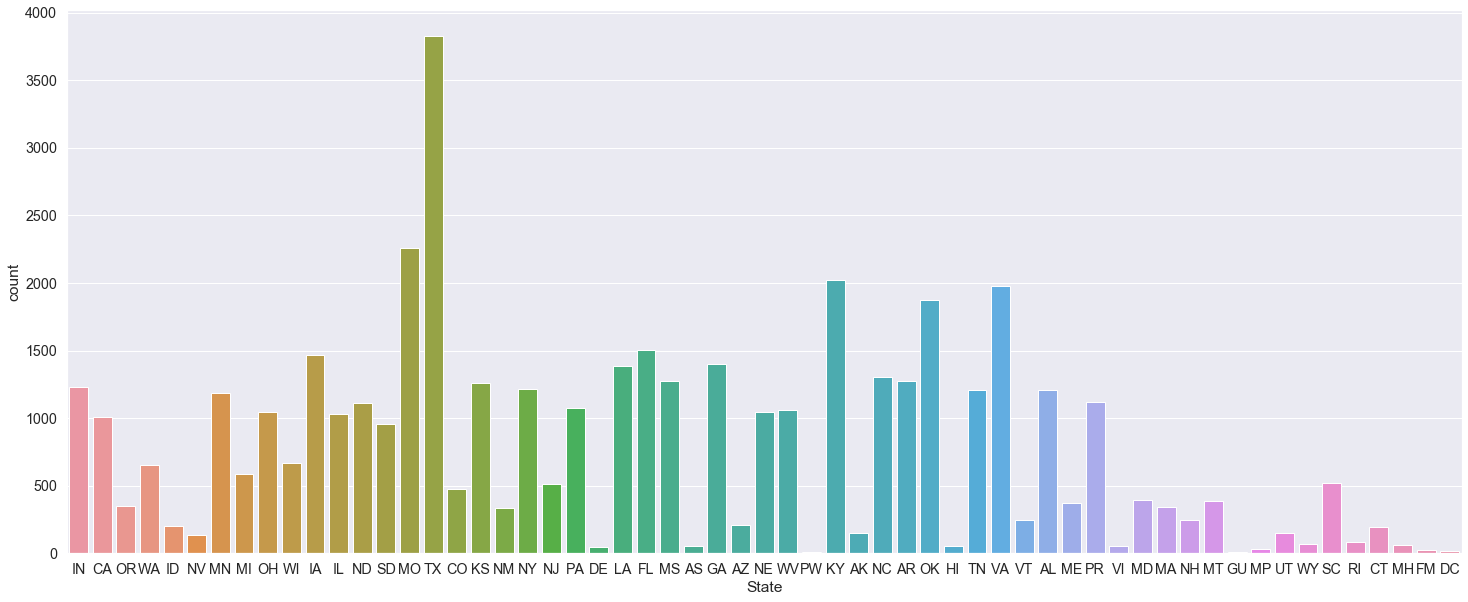

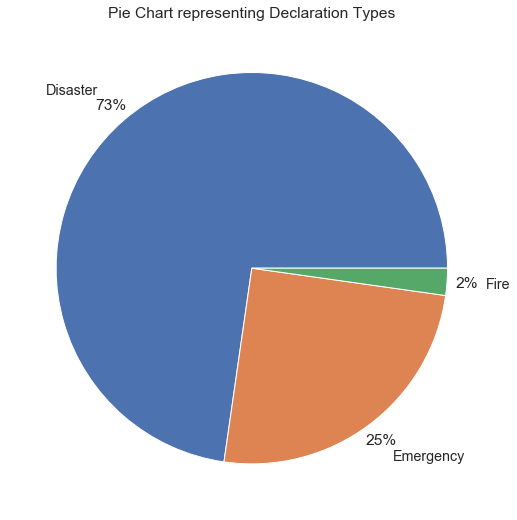

In [41]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 10 points
# Task 3-a: Plot the declaration count for each state . 
# Think of a way to nicely visualize all the states! 
#########################begin code for Task 3-a
plt.figure(figsize=(25,10))
sns.countplot(x="State",data=df_data)
#########################end code for Task 3-a

# 20 points
# Task 3-b: Draw a pie chart that represents Declaration type.
#########################begin code for Task 3-b 
df = df_data['Declaration Type'].value_counts().values
labels = df_data['Declaration Type'].value_counts().index
plt.figure(figsize=(9,9))
plt.pie(df,labels=labels ,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title("Pie Chart representing Declaration Types")
plt.show()
#########################end code for Task 3-b

# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 


When we plot a trend graph by taking Declaration Date on the x-axis and the unique count on the y-axis, we found out that around years 2000-2010 Declaration Type - Emergency had a peak. 

Next when we plot the graph to know whether Individual Assistance Program,Individuals & Households Program,Hazard Mitigation Program was given or not and we observe that it was always not given for most of the years and Hazard Mitigation Program was given for some of the years


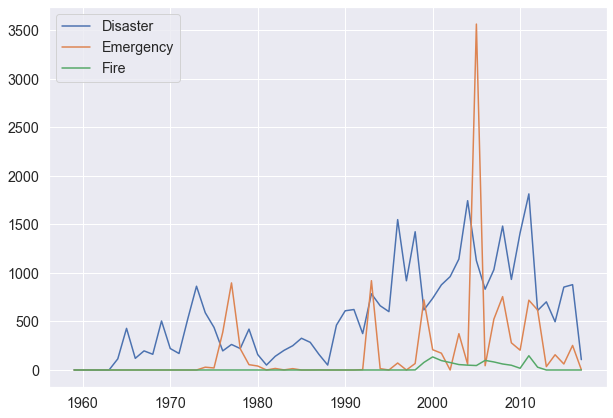

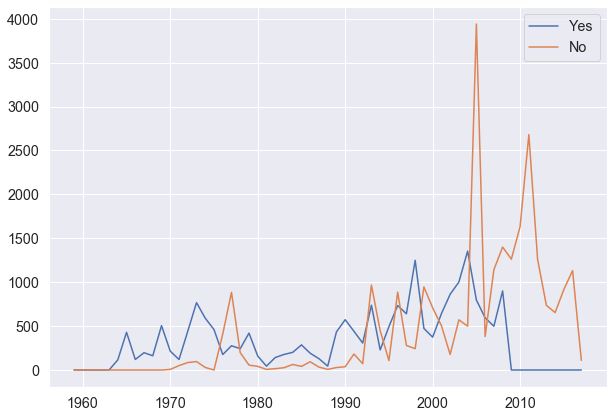

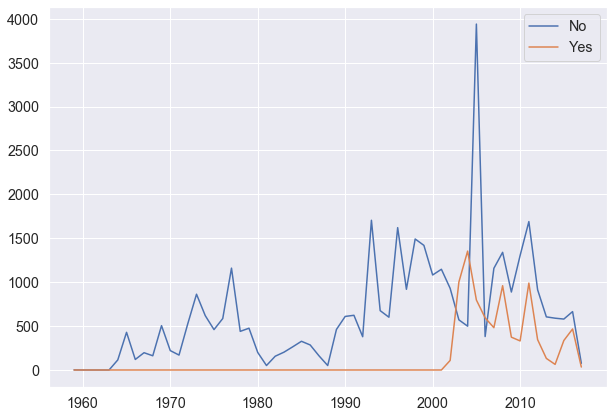

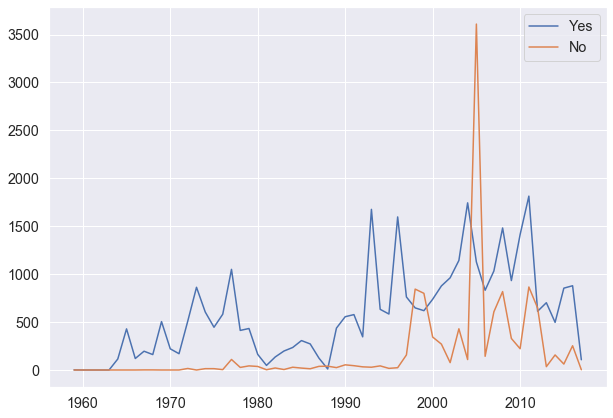

In [86]:
#########################begin code for Task 4  
df_data['year'] = pd.to_datetime(df_data['Declaration Date']).dt.year
def plot_trends(df, min_year, max_year, y_axis, legend, size=(10, 7)):
    results = {}
    years = list(range(min_year, max_year + 1))
    for y in df[legend].unique():
        filter_df = df[df[legend] == y]
        values = []
        for year in years:
            groupby_counts = filter_df.groupby('year')[legend].count()
            groupby_idx = groupby_counts.index
            groupby_values = groupby_counts.values
            if year in groupby_idx:
                values.append(groupby_values[groupby_idx == year][0])
            else:
                values.append(0)
        results[y]= values
    plt.figure().set_size_inches(size)
    for key, val in results.items():
        plt.plot(years, val)
    plt.legend(results.keys())

print("\nWhen we plot a trend graph by taking Declaration Date on the x-axis and the unique count on the y-axis, we found out that around years 2000-2010 Declaration Type - Emergency had a peak. ")
print("\nNext when we plot the graph to know whether Individual Assistance Program,Individuals & Households Program,Hazard Mitigation Program was given or not and we observe that it was always not given for most of the years and Hazard Mitigation Program was given for some of the years")
plot_trends(df_data, df_data.year.min(), df_data.year.max(), 'count', 'Declaration Type' )
plot_trends(df_data, df_data.year.min(), df_data.year.max(), 'count', 'Individual Assistance Program' )
plot_trends(df_data, df_data.year.min(), df_data.year.max(), 'count', 'Individuals & Households Program' )
plot_trends(df_data, df_data.year.min(), df_data.year.max(), 'count', 'Hazard Mitigation Program' )


#########################end code for Task 4

# Task 5:

Use Weka to 
1) Find out how to convert the used dataset in weka format 
2) Convert it 
3) use the weka visualizer to produce some graphs.

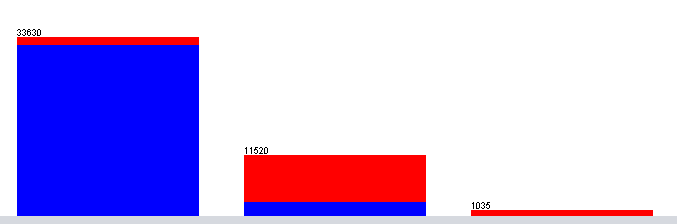

                                                                             Bar Chart representing Declaration Type

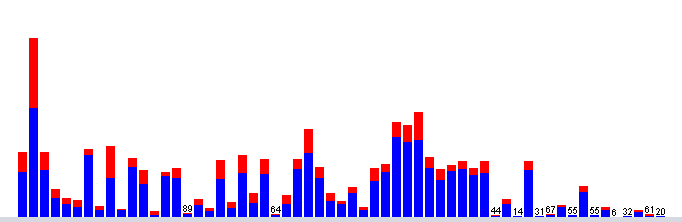

                                                                               Bar Chart representing States

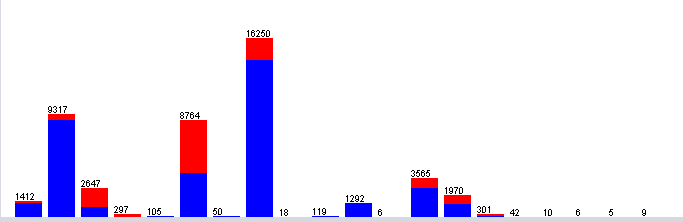

                                                                                  Bar Chart representing Disaster Type

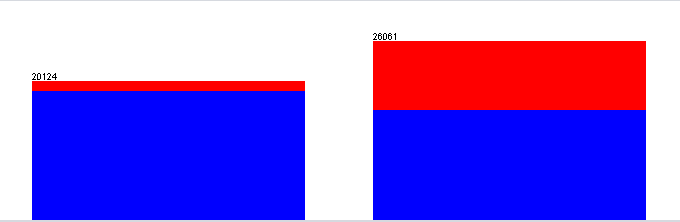

                                                                                    Bar Chart representing Individual Assistance Program

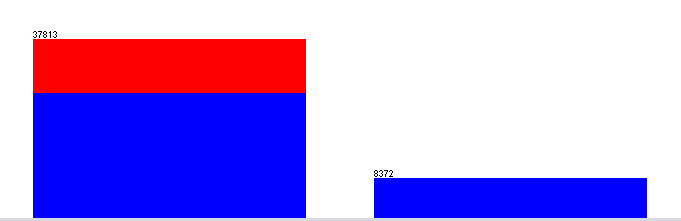

                                                                                        Bar Chart representing Individuals & Households Program

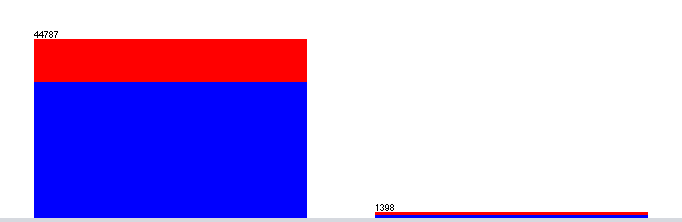

                                                                                           Bar Chart representing Public Assistance Program

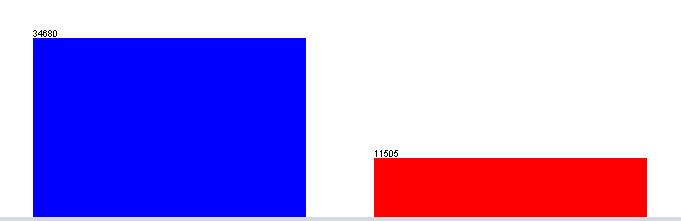

                                                                                               Bar Chart representing Hazard Mitigation Program